In [2]:
import metpy.calc as mpcalc

In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
dataset = xr.open_dataset('/Users/annadugoul/Documents/ERA5/2wind')
dataset

<xarray.Dataset>
Dimensions:    (longitude: 181, latitude: 101, time: 13248)
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 ... 2018-08-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-28 16:00:21 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [4]:
dataarray_u = dataset.u10.resample(time='1D').interpolate('linear')
dataarray_u

<xarray.DataArray 'u10' (time: 5936, latitude: 101, longitude: 181)>
array([[[-2.17595673, -2.25560617, -2.29128218, ..., -1.12392235,
         -0.87087011, -0.65681267],
        [-2.48542738, -2.20914412, -2.13779163, ..., -1.9560914 ,
         -1.68727541, -1.39273882],
        [-2.87371778, -2.55595016, -2.03491116, ..., -2.57586241,
         -2.40245962, -2.05731249],
        ...,
        [ 6.69913197,  6.60703659,  6.38883114, ...,  3.90974712,
          4.0250721 ,  3.94376373],
        [ 6.55974483,  6.48673344,  6.4701395 , ...,  4.52205086,
          4.60087013,  4.35445595],
        [ 6.45271683,  6.3622818 ,  6.30586338, ...,  4.57017231,
          4.6083374 ,  4.67554188]],

       [[-3.34248686, -3.81125641, -3.87597132, ..., -0.6194768 ,
         -0.07935524,  0.52797031],
        [-3.25454092, -3.24126625, -3.13423729, ..., -1.53710318,
         -0.99615145, -0.41454601],
        [-2.57337379, -2.53686762, -2.16434145, ..., -2.19089079,
         -1.69059372, -1.11562538],
...
        [ 7.72046757,  7.39772224,  7.10650444, ...,  0.21684074,
          0.32138062,  0.59019661],
        [ 7.92290974,  7.60680199,  7.4201231 , ...,  0.25915432,
          0.28321505,  0.47653055],
        [ 8.08137894,  7.78767204,  7.5429163 , ...,  0.3006382 ,
          0.32386923,  0.44749165]],

       [[-3.48270321, -3.56981945, -3.66855145, ..., -0.19551039,
          0.19443941,  0.35954571],
        [-3.8485918 , -3.86850429, -3.91081786, ..., -0.89078236,
         -0.54812431, -0.24280214],
        [-4.26675081, -4.29330063, -4.21531057, ..., -1.3371501 ,
         -1.20772028, -0.93309593],
        ...,
        [ 7.39274406,  7.55204296,  7.56199837, ..., -0.60703182,
         -0.72235727, -0.79122066],
        [ 7.42842007,  7.53793812,  7.66238976, ..., -0.72982454,
         -0.83768272, -0.83934212],
        [ 7.62256527,  7.52300358,  7.59020805, ..., -0.72152758,
         -0.80532503, -0.83685303]]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 2002-06-02 ... 2018-08-31
Attributes:
    units:      m s**-1
    long_name:  10 metre U wind component

In [5]:
dataarray_v = dataset.v10.resample(time='1D').interpolate('linear')
dataarray_v

<xarray.DataArray 'v10' (time: 5936, latitude: 101, longitude: 181)>
array([[[ 8.88643503e-01,  5.67516804e-01,  2.53730297e-01, ...,
         -5.13303280e-01, -8.03234816e-01, -1.03811598e+00],
        [ 1.32170534e+00,  7.89552927e-01,  4.99621630e-01, ...,
         -6.91299200e-01, -9.31685448e-01, -1.13537133e+00],
        [ 2.40885258e-01, -3.88522625e-01, -9.55540419e-01, ...,
         -9.17005301e-01, -9.57375526e-01, -9.64715481e-01],
        ...,
        [-1.47851801e+00, -1.68587399e+00, -1.89322996e+00, ...,
          3.40077066e+00,  3.06312895e+00,  2.88329792e+00],
        [-1.91341507e+00, -2.06388569e+00, -2.20701647e+00, ...,
          2.87779284e+00,  3.15671444e+00,  3.42646074e+00],
        [-2.30427194e+00, -2.43822765e+00, -2.55750322e+00, ...,
          2.16397476e+00,  2.85393810e+00,  3.47600603e+00]],

       [[ 1.21894503e+00,  1.65934706e+00,  1.62264681e+00, ...,
          1.82816792e+00,  1.52355671e+00,  1.08315420e+00],
        [ 2.90715313e+00,  2.65575695e+00,  2.55850124e+00, ...,
          1.02443409e+00,  7.06977606e-01,  3.06945562e-01],
        [ 3.62280655e+00,  3.30168009e+00,  3.06679916e+00, ...,
          6.28072262e-01,  5.98711967e-01,  6.20732069e-01],
...
        [ 1.14554453e+00,  9.34518814e-01,  6.33577108e-01, ...,
          1.05462952e+01,  1.01866331e+01,  1.03627939e+01],
        [ 1.05746412e+00,  9.19838667e-01,  8.17078114e-01, ...,
          1.05848303e+01,  1.02820539e+01,  1.04013290e+01],
        [ 8.72128248e-01,  8.50108147e-01,  7.65697718e-01, ...,
          1.05536346e+01,  1.04325247e+01,  1.04894094e+01]],

       [[-2.43822765e+00, -2.30427194e+00, -2.18132639e+00, ...,
          2.20700264e-01, -9.30862427e-02, -3.68337631e-01],
        [-1.90791011e+00, -1.78312945e+00, -1.62898874e+00, ...,
         -3.53657484e-01, -5.92208624e-01, -7.94059753e-01],
        [-1.77211940e+00, -1.67669892e+00, -1.49319804e+00, ...,
         -6.91299200e-01, -6.28908873e-01, -4.16047812e-01],
        ...,
        [ 3.03560400e+00,  2.92366838e+00,  2.56400633e+00, ...,
          6.18814945e+00,  6.06336880e+00,  6.13126373e+00],
        [ 2.95302820e+00,  2.85026789e+00,  2.76402235e+00, ...,
          6.12759399e+00,  6.08538818e+00,  6.24870396e+00],
        [ 2.90715313e+00,  2.71998215e+00,  2.62456179e+00, ...,
          6.32026958e+00,  6.29824924e+00,  6.36798000e+00]]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 2002-06-02 ... 2018-08-31
Attributes:
    units:      m s**-1
    long_name:  10 metre V wind component

In [6]:
dataset['wind_speed'] = mpcalc.wind_speed(dataset['u10'], dataset['v10'])

In [7]:
dataarray_wind_speed = dataset.wind_speed.resample(time='1D').interpolate('linear')
dataarray_wind_speed

<xarray.DataArray 'wind_speed' (time: 5936, latitude: 101, longitude: 181)>
array([[[ 2.35042   ,  2.32590508,  2.30528808, ...,  1.23558962,
          1.18473661,  1.22844934],
        [ 2.81500506,  2.345999  ,  2.19539857, ...,  2.07465386,
          1.92741692,  1.79688334],
        [ 2.88379598,  2.5853107 ,  2.24809265, ...,  2.73422122,
          2.58619022,  2.27226996],
        ...,
        [ 6.8603487 ,  6.81873178,  6.66344357, ...,  5.18183041,
          5.05805922,  4.88535357],
        [ 6.83311081,  6.80715322,  6.83619976, ...,  5.36009693,
          5.57968235,  5.54093122],
        [ 6.85180426,  6.81348562,  6.80475807, ...,  5.05660582,
          5.42049217,  5.82608891]],

       [[ 3.5578146 ,  4.15681458,  4.20192051, ...,  1.93027186,
          1.52562189,  1.20497954],
        [ 4.36389446,  4.19032812,  4.04590797, ...,  1.84720099,
          1.22152984,  0.51581389],
        [ 4.44375706,  4.16374683,  3.75361562, ...,  2.27913976,
          1.79347801,  1.27668643],
...
        [ 7.80499172,  7.45651531,  7.13469172, ..., 10.5485239 ,
         10.19170189, 10.37958717],
        [ 7.9931674 ,  7.66221523,  7.4649744 , ..., 10.5880022 ,
         10.28595352, 10.41223907],
        [ 8.12830162,  7.83393383,  7.58168077, ..., 10.55791569,
         10.43755054, 10.49895   ]],

       [[ 4.25137329,  4.2489152 ,  4.26807404, ...,  0.29484388,
          0.21557307,  0.51472878],
        [ 4.29555368,  4.25968027,  4.23651981, ...,  0.95841891,
          0.80693948,  0.83035159],
        [ 4.62012672,  4.60909414,  4.47196627, ...,  1.50527906,
          1.36165881,  1.0216476 ],
        ...,
        [ 7.99171782,  8.09822178,  7.98485708, ...,  6.21785212,
          6.10624647,  6.18210506],
        [ 7.99386024,  8.05881691,  8.14567566, ...,  6.17090368,
          6.14277315,  6.3048234 ],
        [ 8.15812683,  7.99961758,  8.03116322, ...,  6.36132145,
          6.34952688,  6.42273235]]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 2002-06-02 ... 2018-08-31

In [8]:
surface_pressure = xr.open_dataset('/Users/annadugoul/Documents/ERA5/3sp')
dataarray_sp = surface_pressure.sp.resample(time='1D').interpolate('linear')
dataset_sp = dataarray_sp.to_dataset(name='sp')
sp_hPa = dataset_sp.sp / 100

In [9]:
mdata_u = dataarray_u.where(sp_hPa>=500)

In [10]:
mdata_v = dataarray_v.where(sp_hPa>=500)

In [11]:
mdata_ws = dataarray_wind_speed.where(sp_hPa>=500)

In [12]:
t_u = mdata_u.sel(time=slice('2013-7-4', '2013-7-9'))
t_u

<xarray.DataArray 'u10' (time: 6, latitude: 101, longitude: 181)>
array([[[ 3.05683613e+00,  3.14229298e+00,  3.15058994e+00, ...,
          1.32529354e+00,  1.72270966e+00,  2.05873013e+00],
        [ 2.67850208e+00,  2.52252197e+00,  2.47854900e+00, ...,
          2.03565598e-01,  5.71944237e-01,  9.46129799e-01],
        [ 1.77414989e+00,  1.58996105e+00,  1.29127693e+00, ...,
         -7.29824543e-01, -8.60913754e-01, -2.95072079e-01],
        ...,
        [ 8.39250851e+00,  8.22242451e+00,  8.27801323e+00, ...,
         -8.01177025e-01, -1.33715010e+00, -1.78019953e+00],
        [ 9.01476955e+00,  8.69202328e+00,  8.62316036e+00, ...,
         -1.15876913e+00, -1.61260414e+00, -1.94530582e+00],
        [ 9.83366299e+00,  9.41716290e+00,  9.22135830e+00, ...,
         -1.43256330e+00, -1.79596329e+00, -2.07722473e+00]],

       [[ 1.83637619e+00,  1.79489231e+00,  1.82559013e+00, ...,
          3.01618099e+00,  3.05351734e+00,  2.89006996e+00],
        [ 1.82061195e+00,  1.79074383e+00,  1.90192127e+00, ...,
          2.52501106e+00,  2.55404949e+00,  2.40304756e+00],
        [ 1.97327328e+00,  1.92017365e+00,  1.98405933e+00, ...,
          1.72685814e+00,  1.93925667e+00,  2.24374962e+00],
...
        [ 6.83436966e+00,  6.64271355e+00,  6.24529648e+00, ...,
         -8.31874847e-01, -7.67989635e-01, -8.35193634e-01],
        [ 6.97956371e+00,  6.82026482e+00,  6.66677380e+00, ...,
         -9.71261024e-01, -8.69210720e-01, -9.06546116e-01],
        [ 7.19693947e+00,  6.94305706e+00,  6.81113815e+00, ...,
         -1.10566950e+00, -9.83706474e-01, -1.02104187e+00]],

       [[-1.72046232e+00, -1.83412838e+00, -2.06726885e+00, ...,
         -5.45635223e-01, -5.40657043e-01, -4.65986252e-01],
        [-1.67648935e+00, -1.69806099e+00, -1.94696522e+00, ...,
         -1.19444513e+00, -1.17287350e+00, -1.05174017e+00],
        [-1.73622608e+00, -1.76111650e+00, -2.02827358e+00, ...,
         -1.82832098e+00, -1.89469528e+00, -1.66404438e+00],
        ...,
        [ 6.88000202e+00,  6.80947876e+00,  6.53153610e+00, ...,
          4.14304733e-01,  3.38803768e-01, -2.80137539e-01],
        [ 7.22680759e+00,  7.16209316e+00,  7.01772881e+00, ...,
          8.16030502e-02,  8.65807533e-02, -2.89264202e-01],
        [ 7.62588406e+00,  7.41929340e+00,  7.22431946e+00, ...,
         -3.63935471e-01, -3.23281288e-01, -5.30701160e-01]]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2013-07-04 2013-07-05 ... 2013-07-09
Attributes:
    units:      m s**-1
    long_name:  10 metre U wind component

In [13]:
t_v = mdata_v.sel(time=slice('2013-7-4', '2013-7-9'))
t_v

<xarray.DataArray 'v10' (time: 6, latitude: 101, longitude: 181)>
array([[[-3.97697687e-01, -1.24281406e-01,  1.27114773e-01, ...,
         -5.40176678e+00, -5.36873674e+00, -5.06596041e+00],
        [ 1.07214451e+00,  1.14921474e+00,  1.34189081e+00, ...,
         -5.84950924e+00, -5.62563801e+00, -5.09532070e+00],
        [ 1.44832134e+00,  1.48685646e+00,  1.67769718e+00, ...,
         -5.47516727e+00, -5.52838230e+00, -5.57792759e+00],
        ...,
        [ 1.07397938e+00,  9.93238926e-01,  1.01158905e+00, ...,
          7.23492622e-01,  4.79436398e-01,  3.49150896e-01],
        [ 7.21657515e-01,  6.07887030e-01,  5.25311708e-01, ...,
          5.56506872e-01,  2.20700264e-01,  4.45394516e-02],
        [ 6.95967436e-01,  3.14285755e-01,  1.78494930e-01, ...,
          3.65665913e-01, -2.15208530e-02, -2.10526943e-01]],

       [[-1.97947538e+00, -1.92442513e+00, -1.84551978e+00, ...,
         -1.33456469e-01, -4.63757992e-01, -7.33504295e-01],
        [-1.13170135e+00, -1.19409156e+00, -1.10050619e+00, ...,
         -1.62816525e-01, -3.70172739e-01, -5.22478342e-01],
        [-9.20675278e-01, -1.03077579e+00, -1.00325060e+00, ...,
         -9.49213505e-02, -1.04096413e-01, -3.72007608e-01],
...
        [ 3.56959152e+00,  3.37875032e+00,  3.05945873e+00, ...,
          4.14394903e+00,  3.73841238e+00,  3.46683073e+00],
        [ 3.57509661e+00,  3.44664574e+00,  3.37508059e+00, ...,
          4.05770350e+00,  3.70905209e+00,  3.46499586e+00],
        [ 3.46683073e+00,  3.32553530e+00,  3.27048492e+00, ...,
          3.90723276e+00,  3.61179638e+00,  3.38242054e+00]],

       [[-8.98655176e-01,  6.00409508e-03,  1.21160507e+00, ...,
         -1.08399105e+00, -1.32804728e+00, -1.67486393e+00],
        [ 4.57416296e-01,  1.05746412e+00,  2.13644934e+00, ...,
         -1.31703722e+00, -1.54090834e+00, -1.81432462e+00],
        [ 1.42630100e+00,  1.91991854e+00,  2.26673508e+00, ...,
         -1.81248963e+00, -1.80147958e+00, -1.78863454e+00],
        ...,
        [ 4.54765129e+00,  4.35314035e+00,  3.94026327e+00, ...,
          1.51071119e+00,  1.08131933e+00,  7.87718058e-01],
        [ 4.28157473e+00,  4.16963911e+00,  4.17881441e+00, ...,
          1.90340328e+00,  1.59512186e+00,  1.30335522e+00],
        [ 4.09623909e+00,  4.00999355e+00,  4.04485846e+00, ...,
          2.29609537e+00,  2.09240913e+00,  1.78779793e+00]]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2013-07-04 2013-07-05 ... 2013-07-09
Attributes:
    units:      m s**-1
    long_name:  10 metre V wind component

In [14]:
t_speed = mdata_ws.sel(time=slice('2013-7-4', '2013-7-9'))
t_speed

<xarray.DataArray 'wind_speed' (time: 6, latitude: 101, longitude: 181)>
array([[[3.08259797, 3.14474964, 3.15315318, ..., 5.56196785,
         5.63835621, 5.46830177],
        [2.88511133, 2.77196884, 2.81848836, ..., 5.85305023,
         5.65463734, 5.18241787],
        [2.29024935, 2.17685962, 2.11708856, ..., 5.52359486,
         5.5950141 , 5.58572674],
        ...,
        [8.46094704, 8.282197  , 8.33959389, ..., 1.0795027 ,
         1.42050326, 1.81411588],
        [9.04360867, 8.71325397, 8.6391468 , ..., 1.2854749 ,
         1.62763655, 1.94581568],
        [9.85826015, 9.4224062 , 9.2230854 , ..., 1.4784956 ,
         1.79609227, 2.08786607]],

       [[2.70011115, 2.63154912, 2.59590507, ..., 3.01913214,
         3.08853364, 2.98169971],
        [2.14368272, 2.15235162, 2.19736624, ..., 2.53025508,
         2.58073568, 2.45919108],
        [2.17748713, 2.1793499 , 2.22328663, ..., 1.72946501,
         1.94204855, 2.27437949],
...
        [7.71042109, 7.45262384, 6.9544239 , ..., 4.22662163,
         3.81648207, 3.56601501],
        [7.84191465, 7.64168692, 7.47241879, ..., 4.17232609,
         3.80954003, 3.58162284],
        [7.98841953, 7.69839144, 7.55563831, ..., 4.06066179,
         3.743361  , 3.5331707 ]],

       [[1.94102335, 1.83413827, 2.39616108, ..., 1.21357095,
         1.43388271, 1.73847985],
        [1.73777044, 2.00041032, 2.890517  , ..., 1.77800071,
         1.9364996 , 2.09712458],
        [2.24695706, 2.60530591, 3.04170704, ..., 2.57446623,
         2.61442137, 2.44300151],
        ...,
        [8.24715424, 8.08200645, 7.62801647, ..., 1.56649184,
         1.13315463, 0.83604831],
        [8.39991856, 8.28742886, 8.16768074, ..., 1.90515172,
         1.59746981, 1.33506882],
        [8.65640068, 8.43362045, 8.27959347, ..., 2.32475877,
         2.11723566, 1.86490345]]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2013-07-04 2013-07-05 ... 2013-07-09

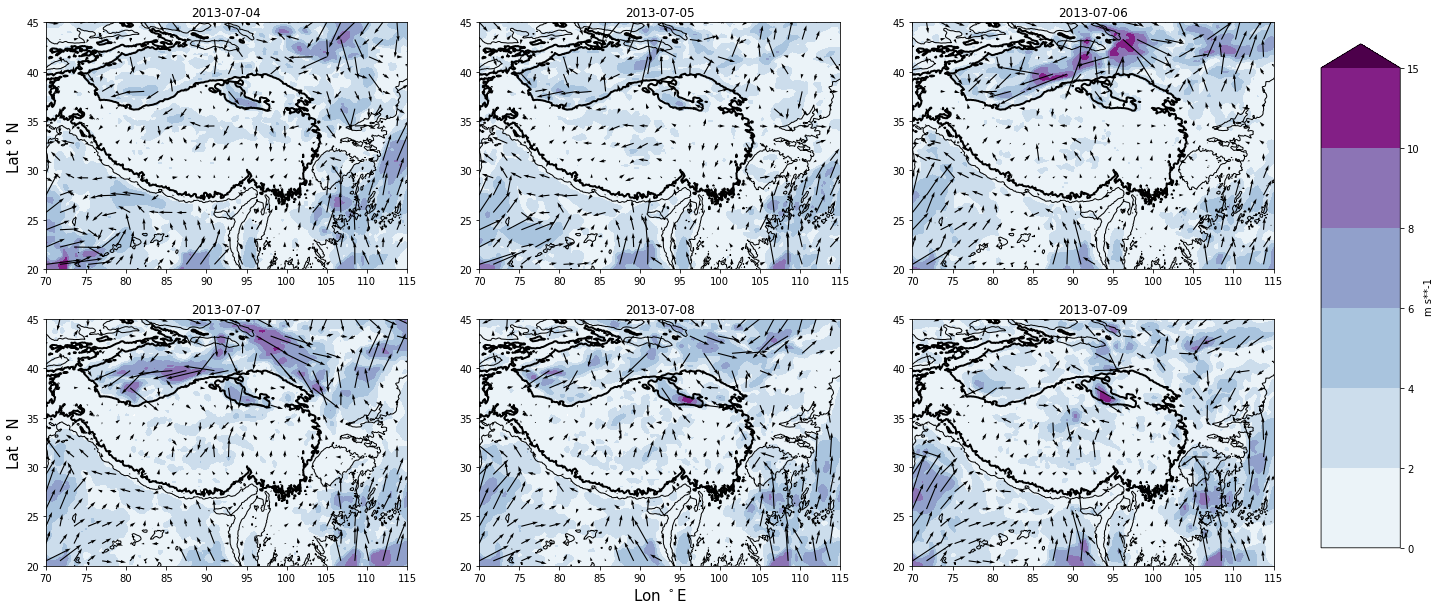

In [15]:
# Total wind speed
fig, ((ax1, ax2,ax3),(ax4,ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(22, 10))
out='/Users/annadugoul/Documents/Data_Thesis/Geopotential/0205june2002.png'
data = xr.open_dataset('/Users/annadugoul/Documents/Data_Thesis/GMTED2010_15n030_0125deg.nc')
lat = data.latitude
lon = data.longitude
elevations = data.elevation
ax1.set_xlim(70,115)
ax1.set_ylim(20,45)
ax2.set_xlim(70,115)
ax2.set_ylim(20,45)
ax3.set_xlim(70,115)
ax3.set_ylim(20,45)
ax4.set_xlim(70,115)
ax4.set_ylim(20,45)
ax5.set_xlim(70,115)
ax5.set_ylim(20,45)
ax6.set_xlim(70,115)
ax6.set_ylim(20,45)

levels= [0,2,4,6,8,10,15]
cmap=plt.cm.BuPu

m=ax1.contourf(t_speed.longitude,t_speed.latitude,t_speed[0], cmap=cmap,levels=levels, extend='max')
m=ax2.contourf(t_speed.longitude,t_speed.latitude,t_speed[1], cmap=cmap,levels=levels, extend='max')
m=ax3.contourf(t_speed.longitude,t_speed.latitude,t_speed[2], cmap=cmap,levels=levels, extend='max')
m=ax4.contourf(t_speed.longitude,t_speed.latitude,t_speed[3], cmap=cmap,levels=levels, extend='max')
m=ax5.contourf(t_speed.longitude,t_speed.latitude,t_speed[4], cmap=cmap,levels=levels, extend='max')
m=ax6.contourf(t_speed.longitude,t_speed.latitude,t_speed[5], cmap=cmap,levels=levels, extend='max')

sc=7

ax1.quiver(t_u.longitude[::sc], t_u.latitude[::sc], (t_u[0])[::sc,::sc], (t_v[0])[::sc,::sc])
ax2.quiver(t_u.longitude[::sc], t_u.latitude[::sc], (t_u[1])[::sc,::sc], (t_v[1])[::sc,::sc])
ax3.quiver(t_u.longitude[::sc], t_u.latitude[::sc], (t_u[2])[::sc,::sc], (t_v[2])[::sc,::sc])
ax4.quiver(t_u.longitude[::sc], t_u.latitude[::sc], (t_u[3])[::sc,::sc], (t_v[3])[::sc,::sc])
ax5.quiver(t_u.longitude[::sc], t_u.latitude[::sc], (t_u[4])[::sc,::sc], (t_v[4])[::sc,::sc])
ax6.quiver(t_u.longitude[::sc], t_u.latitude[::sc], (t_u[5])[::sc,::sc], (t_v[5])[::sc,::sc])
ax1.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax1.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax2.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax2.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax3.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax3.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax4.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax4.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax5.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax5.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax6.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax6.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
cbar_ax = fig.add_axes([0.93, 0.15, 0.05, 0.7])
cbar = fig.colorbar(m,cax=cbar_ax, label=t_u.units)
ax1.set_title(str(t_u.time.values[0])[0:10])
ax2.set_title(str(t_u.time.values[1])[0:10])
ax3.set_title(str(t_u.time.values[2])[0:10])
ax4.set_title(str(t_u.time.values[3])[0:10])
ax5.set_title(str(t_u.time.values[4])[0:10])
ax6.set_title(str(t_u.time.values[5])[0:10])

ax1.set_ylabel('Lat ° N',  fontsize=15)
ax4.set_ylabel('Lat ° N',  fontsize=15)

ax5.set_xlabel('Lon $^\circ$E',  fontsize=15)

fig.subplots_adjust()
plt.savefig(out,bbox_inches = 'tight', transparent = False, facecolor = 'white')

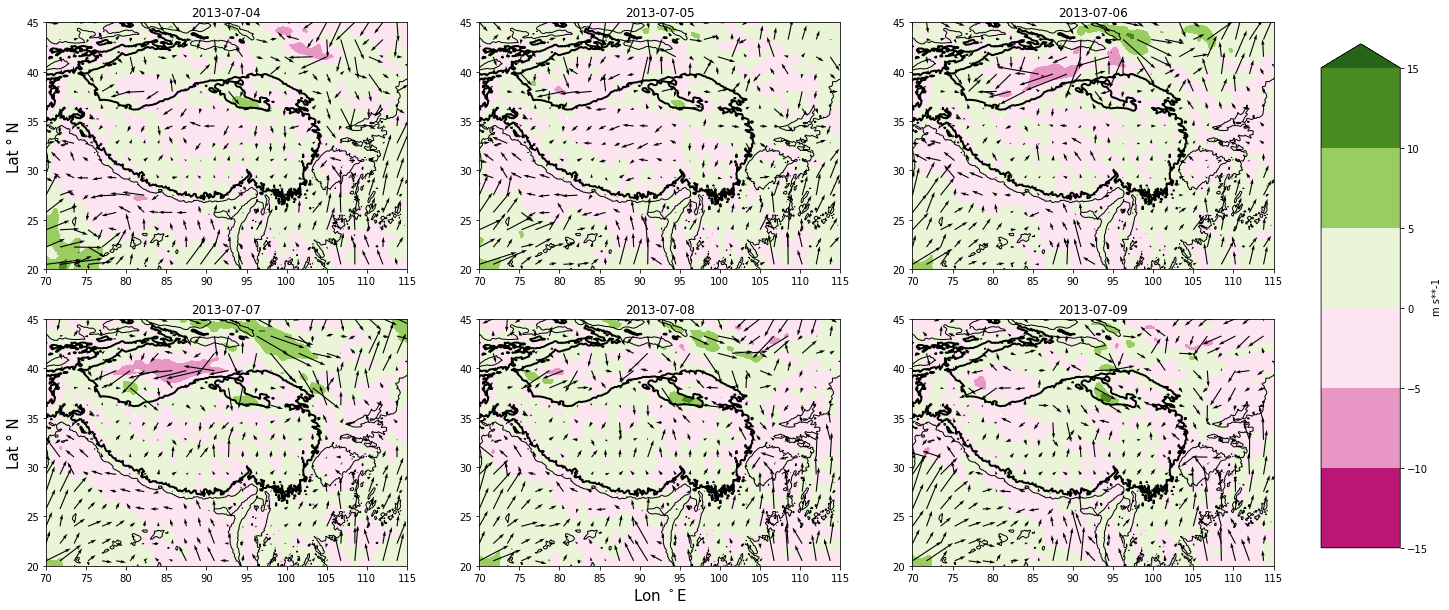

In [16]:
# U component speed
fig, ((ax1, ax2,ax3),(ax4,ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(22, 10))
out='/Users/annadugoul/Documents/Data_Thesis/Geopotential/0205june2002.png'
data = xr.open_dataset('/Users/annadugoul/Documents/Data_Thesis/GMTED2010_15n030_0125deg.nc')
lat = data.latitude
lon = data.longitude
elevations = data.elevation
ax1.set_xlim(70,115)
ax1.set_ylim(20,45)
ax2.set_xlim(70,115)
ax2.set_ylim(20,45)
ax3.set_xlim(70,115)
ax3.set_ylim(20,45)
ax4.set_xlim(70,115)
ax4.set_ylim(20,45)
ax5.set_xlim(70,115)
ax5.set_ylim(20,45)
ax6.set_xlim(70,115)
ax6.set_ylim(20,45)

levels=[-15,-10,-5,0,5,10,15]
cmap=plt.cm.PiYG

m=ax1.contourf(t_u.longitude,t_u.latitude,t_u[0], cmap=cmap, levels=levels, extend='max')
m=ax2.contourf(t_u.longitude,t_u.latitude,t_u[1], cmap=cmap,levels=levels, extend='max')
m=ax3.contourf(t_u.longitude,t_u.latitude,t_u[2], cmap=cmap,levels=levels, extend='max')
m=ax4.contourf(t_u.longitude,t_u.latitude,t_u[3], cmap=cmap,levels=levels, extend='max')
m=ax5.contourf(t_u.longitude,t_u.latitude,t_u[4], cmap=cmap,levels=levels, extend='max')
m=ax6.contourf(t_u.longitude,t_u.latitude,t_u[5], cmap=cmap,levels=levels, extend='max')

sc=7

ax1.quiver(t_u.longitude[::sc], t_u.latitude[::sc], (t_u[0])[::sc,::sc], (t_v[0])[::sc,::sc])
ax2.quiver(t_u.longitude[::sc], t_u.latitude[::sc], (t_u[1])[::sc,::sc], (t_v[1])[::sc,::sc])
ax3.quiver(t_u.longitude[::sc], t_u.latitude[::sc], (t_u[2])[::sc,::sc], (t_v[2])[::sc,::sc])
ax4.quiver(t_u.longitude[::sc], t_u.latitude[::sc], (t_u[3])[::sc,::sc], (t_v[3])[::sc,::sc])
ax5.quiver(t_u.longitude[::sc], t_u.latitude[::sc], (t_u[4])[::sc,::sc], (t_v[4])[::sc,::sc])
ax6.quiver(t_u.longitude[::sc], t_u.latitude[::sc], (t_u[5])[::sc,::sc], (t_v[5])[::sc,::sc])
ax1.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax1.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax2.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax2.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax3.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax3.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax4.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax4.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax5.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax5.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax6.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax6.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
cbar_ax = fig.add_axes([0.93, 0.15, 0.05, 0.7])
cbar = fig.colorbar(m,cax=cbar_ax, label=t_u.units)
ax1.set_title(str(t_u.time.values[0])[0:10])
ax2.set_title(str(t_u.time.values[1])[0:10])
ax3.set_title(str(t_u.time.values[2])[0:10])
ax4.set_title(str(t_u.time.values[3])[0:10])
ax5.set_title(str(t_u.time.values[4])[0:10])
ax6.set_title(str(t_u.time.values[5])[0:10])

ax1.set_ylabel('Lat ° N',  fontsize=15)
ax4.set_ylabel('Lat ° N',  fontsize=15)

ax5.set_xlabel('Lon $^\circ$E',  fontsize=15)

fig.subplots_adjust()
plt.savefig(out,bbox_inches = 'tight', transparent = False, facecolor = 'white')

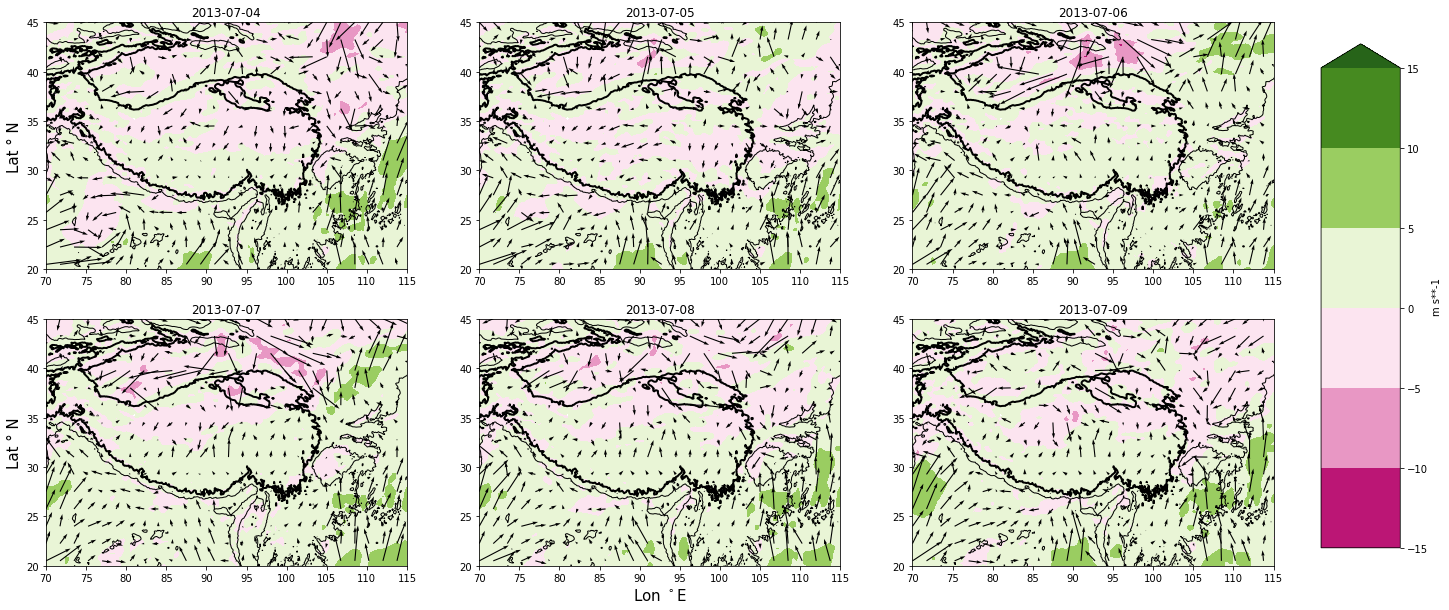

In [17]:
# V component speed
fig, ((ax1, ax2,ax3),(ax4,ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(22, 10))
out='/Users/annadugoul/Documents/Data_Thesis/Geopotential/0205june2002.png'
data = xr.open_dataset('/Users/annadugoul/Documents/Data_Thesis/GMTED2010_15n030_0125deg.nc')
lat = data.latitude
lon = data.longitude
elevations = data.elevation
ax1.set_xlim(70,115)
ax1.set_ylim(20,45)
ax2.set_xlim(70,115)
ax2.set_ylim(20,45)
ax3.set_xlim(70,115)
ax3.set_ylim(20,45)
ax4.set_xlim(70,115)
ax4.set_ylim(20,45)
ax5.set_xlim(70,115)
ax5.set_ylim(20,45)
ax6.set_xlim(70,115)
ax6.set_ylim(20,45)

levels=[-15,-10,-5,0,5,10,15]
cmap=plt.cm.PiYG

m=ax1.contourf(t_v.longitude,t_v.latitude,t_v[0], cmap=cmap, levels=levels, extend='max')
m=ax2.contourf(t_v.longitude,t_v.latitude,t_v[1], cmap=cmap, levels=levels, extend='max')
m=ax3.contourf(t_v.longitude,t_v.latitude,t_v[2], cmap=cmap, levels=levels, extend='max')
m=ax4.contourf(t_v.longitude,t_v.latitude,t_v[3], cmap=cmap, levels=levels, extend='max')
m=ax5.contourf(t_v.longitude,t_v.latitude,t_v[4], cmap=cmap, levels=levels, extend='max')
m=ax6.contourf(t_v.longitude,t_v.latitude,t_v[5], cmap=cmap, levels=levels, extend='max')

sc=7

ax1.quiver(t_u.longitude[::sc], t_u.latitude[::sc], (t_u[0])[::sc,::sc], (t_v[0])[::sc,::sc])
ax2.quiver(t_u.longitude[::sc], t_u.latitude[::sc], (t_u[1])[::sc,::sc], (t_v[1])[::sc,::sc])
ax3.quiver(t_u.longitude[::sc], t_u.latitude[::sc], (t_u[2])[::sc,::sc], (t_v[2])[::sc,::sc])
ax4.quiver(t_u.longitude[::sc], t_u.latitude[::sc], (t_u[3])[::sc,::sc], (t_v[3])[::sc,::sc])
ax5.quiver(t_u.longitude[::sc], t_u.latitude[::sc], (t_u[4])[::sc,::sc], (t_v[4])[::sc,::sc])
ax6.quiver(t_u.longitude[::sc], t_u.latitude[::sc], (t_u[5])[::sc,::sc], (t_v[5])[::sc,::sc])
ax1.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax1.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax2.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax2.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax3.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax3.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax4.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax4.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax5.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax5.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
ax6.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax6.contour(lon, lat, elevations, [700], cmap = 'Greys_r', linewidths = [1.0])
cbar_ax = fig.add_axes([0.93, 0.15, 0.05, 0.7])
cbar = fig.colorbar(m,cax=cbar_ax, label=t_u.units)
ax1.set_title(str(t_u.time.values[0])[0:10])
ax2.set_title(str(t_u.time.values[1])[0:10])
ax3.set_title(str(t_u.time.values[2])[0:10])
ax4.set_title(str(t_u.time.values[3])[0:10])
ax5.set_title(str(t_u.time.values[4])[0:10])
ax6.set_title(str(t_u.time.values[5])[0:10])

ax1.set_ylabel('Lat ° N',  fontsize=15)
ax4.set_ylabel('Lat ° N',  fontsize=15)

ax5.set_xlabel('Lon $^\circ$E',  fontsize=15)

fig.subplots_adjust()
plt.savefig(out,bbox_inches = 'tight', transparent = False, facecolor = 'white')